In [1]:
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
#import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
uploaded = files.upload()

Saving TwitterDataPrepWithoutSentiAnalysis1.csv to TwitterDataPrepWithoutSentiAnalysis1.csv


In [7]:
# Reading the dataset
data = pd.read_csv('TwitterDataPrepWithoutSentiAnalysis1.csv', encoding='utf-8') # Read the dataset
data.head(10)
df = data.copy()
df.drop('Unnamed: 0', axis=1,inplace=True)

In [8]:
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang',
       'possibly_sensitive', 'extended_entities', 'quoted_status',
       'withheld_in_countries', 'usr_name', 'foll_count', 'friends_count',
       'fav_count', 'status_count', 'listed_count', 'screen_name'],
      dtype='object')

In [9]:
# Percentage of null values
null_perc = df.isnull().sum()/df.shape[0]*100

In [10]:
#List of columns having more than 75% of null values
col_to_drop = null_perc[null_perc>75].keys()

In [11]:
col_to_drop

Index(['in_reply_to_status_id', 'in_reply_to_status_id_str', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'extended_entities',
       'quoted_status', 'withheld_in_countries'],
      dtype='object')

In [12]:
df1 = df.drop(col_to_drop, axis=1)

In [13]:
#checking unique values
unique = df1.nunique()
# Columns with same values are removed as they cannot be considered as a variable

In [14]:
cols_to_drop = unique[unique==1].keys()

In [15]:
df2 = df1.drop(cols_to_drop, axis=1)

In [16]:
# Finding if there is data for same user name multiple times
df2['usr_name'].nunique() # There are 1106 unique values and total dataframe rows are 1361. Therefore, 1361 - 1106 = 255 repetitive user names

1655

# Creating new metrics from existing metrics

In [62]:
#df2['retw_comments_count'] = df2['retweet_count'] + df2['status_count']

In [17]:
# Number of original tweets by all users in the topic
df2['original_count'] = df2['status_count'] - df2['retweet_count']
N = df2['original_count'].sum()

In [18]:
# Metric: RP3: Number of users who have replied author’s tweets
reply = df2[df2['in_reply_to_screen_name'].notnull()]
df2reply = reply.groupby('in_reply_to_screen_name', sort=False)['usr_name'].count()
reply['in_reply_to_screen_name'].str.count("flyethiopian").sum() # Cross-Checking

3

In [19]:
df2reply = pd.DataFrame(df2reply) # Converting to dataframe

In [20]:
df2reply.rename(columns = {'usr_name':'reply_count'}, inplace=True)
df2reply.columns

Index(['reply_count'], dtype='object')

In [21]:
df3 = pd.merge(df2, df2reply, left_on='screen_name', right_on ='in_reply_to_screen_name', how='left')

In [22]:
df3.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'possibly_sensitive', 'usr_name', 'foll_count',
       'friends_count', 'fav_count', 'status_count', 'listed_count',
       'screen_name', 'original_count', 'reply_count'],
      dtype='object')

In [23]:
df2 = df3

Calculating influence score, popularity score, activity score and importance score

In [24]:
df2['popularity'] = (df2['foll_count'] - df2['friends_count']) / (df2['foll_count'] + df2['friends_count'])

In [25]:
df2['infl_score'] = (df2['retweet_count'] + df2['favorite_count'] + df2['reply_count'])/ (df2['foll_count'] + df2['friends_count'])

In [26]:
df2['activity_score'] = (df2['status_count'] + df2['reply_count'] + df2['retweet_count'] + df2['fav_count'])/N

In [27]:
df2['imp_score'] = (df2['popularity'] + df2['infl_score'] + df2['activity_score']) / 3

In [28]:
pos = df2

In [29]:
pos

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,...,fav_count,status_count,listed_count,screen_name,original_count,reply_count,popularity,infl_score,activity_score,imp_score
0,2023-06-24 05:43:22+00:00,1672480513741713408,1672480513741713408,RT @MakisMD: American Airlines Flight Attendan...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,...,146812,311880,116,PaddyNenagh,311715,NaN,-0.319021,NaN,NaN,NaN
1,2023-06-24 05:43:12+00:00,1672480471866023938,1672480471866023936,@joiedevivre789 Transit travels are better thr...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.385473e+18,1.385473e+18,joiedevivre789,...,62235,90910,62,moinaksg,90910,NaN,0.339744,NaN,NaN,NaN
2,2023-06-24 05:43:07+00:00,1672480451582124034,1672480451582124032,Aeromexico Flight Change policy\n\nIf you want...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,...,0,5,0,reservationsbuy,5,NaN,-1.000000,NaN,NaN,NaN
3,2023-06-24 05:42:56+00:00,1672480403553411073,1672480403553411072,United Airlines flight #UAL1597 spotted at 775...,False,"{'hashtags': [{'text': 'UAL1597', 'indices': [...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,NaN,...,9,4946041,15,laxradar,4946041,NaN,0.931741,NaN,NaN,NaN
4,2023-06-24 05:42:26+00:00,1672480280580603904,1672480280580603904,"United Airlines flight #UAL1813 spotted at 29,...",False,"{'hashtags': [{'text': 'UAL1813', 'indices': [...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,NaN,...,9,4946041,15,laxradar,4946041,NaN,0.931741,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,2023-07-12 00:50:42+00:00,1678929846158622720,1678929846158622720,Flair Airlines #984/C-GCJL arrived at Halifax ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://flightaware.com/"" rel=""nofollo...",NaN,NaN,NaN,...,169,21989,5,GlobalX_Tracker,21989,NaN,0.800000,NaN,NaN,NaN
2554,2023-07-12 00:50:30+00:00,1678929795432976385,1678929795432976384,China Airlines\nCI120 CAL120\nfrom TPE to OKA\...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,1434,125373,28,tan_tan_ch,125373,1.0,0.445806,0.001885,0.000037,0.149243
2555,2023-07-12 00:50:10+00:00,1678929710208671747,1678929710208671744,I WAS FLYING WORKING A TRIP FOR UNITED AIRLINE...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,...,0,4364,0,9northmoore,4364,NaN,-0.750000,NaN,NaN,NaN
2556,2023-07-12 00:50:03+00:00,1678929681339281408,1678929681339281408,@Caithlin_mully Oh my. If any of my guitars we...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.140285e+18,1.140285e+18,Caithlin_mully,...,167,873,0,GDanielik,873,NaN,-0.603604,NaN,NaN,NaN


In [30]:
# Aggregating the users based on popularity, influence score, activity score and importance score
pos_pop = pos.groupby('screen_name', sort = False)['popularity'].agg('sum')
pos_infl = pos.groupby('screen_name', sort = False)['infl_score'].agg('sum')
pos_activity = pos.groupby('screen_name', sort = False)['activity_score'].agg('sum')
pos_imp = pos.groupby('screen_name', sort = False)['imp_score'].agg('sum')

In [31]:
# Converting the series into a dataframe
pos_pop = pd.DataFrame(pos_pop)
pos_infl = pd.DataFrame(pos_infl)
pos_activity = pd.DataFrame(pos_activity)
pos_imp = pd.DataFrame(pos_imp)

In [32]:
# Sorting the values based on popularity
pos_pop['popularity'].sort_values(ascending=False)[:10]

screen_name
laxradar           618.081649
GlobalX_Tracker      8.791892
FlyingFreak73        5.758674
makemytripcare       5.660433
AboveStLouis         5.657258
EaseMyTrip           4.997838
rkabushenga          4.968076
tan_tan_ch           4.451773
BaagalaMargret       4.307143
thetrickytrade       3.997958
Name: popularity, dtype: float64

In [33]:
pos_infl['infl_score'].sort_values(ascending=False)[:10]

screen_name
HaroonDvx          1.000000
ImtiazA56745356    0.500000
SatishJ45962597    0.400000
jelly3615120332    0.333333
adansi_health      0.200000
vkuppuluri532      0.153846
EgriJakob          0.125000
pravngupta         0.102564
spieco1978         0.085714
BaagalaMargret     0.066071
Name: infl_score, dtype: float64

In [34]:
pos_activity['activity_score'].sort_values(ascending=False)[:10]

screen_name
MarchandSurgery    0.003194
makemytripcare     0.001597
manilabulletin     0.000475
united             0.000393
tan_tan_ch         0.000372
zeeshan_shah_dc    0.000264
DTPORGE            0.000226
aparanjape         0.000190
dook42_domini      0.000178
rkabushenga        0.000153
Name: activity_score, dtype: float64

In [35]:
pos_imp['imp_score'].sort_values(ascending=False)[:10]

screen_name
makemytripcare    1.887403
rkabushenga       1.656139
tan_tan_ch        1.488767
BaagalaMargret    1.457742
thetrickytrade    1.333549
shecranes256      0.992895
manilabulletin    0.666572
OfwonoOpondo      0.665527
9mm_smg           0.659048
ArenaJet          0.647637
Name: imp_score, dtype: float64

In [36]:
pop_top10 = pd.DataFrame(pos_pop['popularity'].sort_values(ascending=False)[:10])


In [37]:
infl_pop_top10 = pd.DataFrame(pos_infl['infl_score'].sort_values(ascending=False)[:10])


In [38]:
activity_pop_top10 = pd.DataFrame(pos_activity['activity_score'].sort_values(ascending=False)[:10])

In [39]:
imp_top10 = pd.DataFrame(pos_imp['imp_score'].sort_values(ascending=False)[:10])

Bar plot of top 10 users based on:

1. Popularity

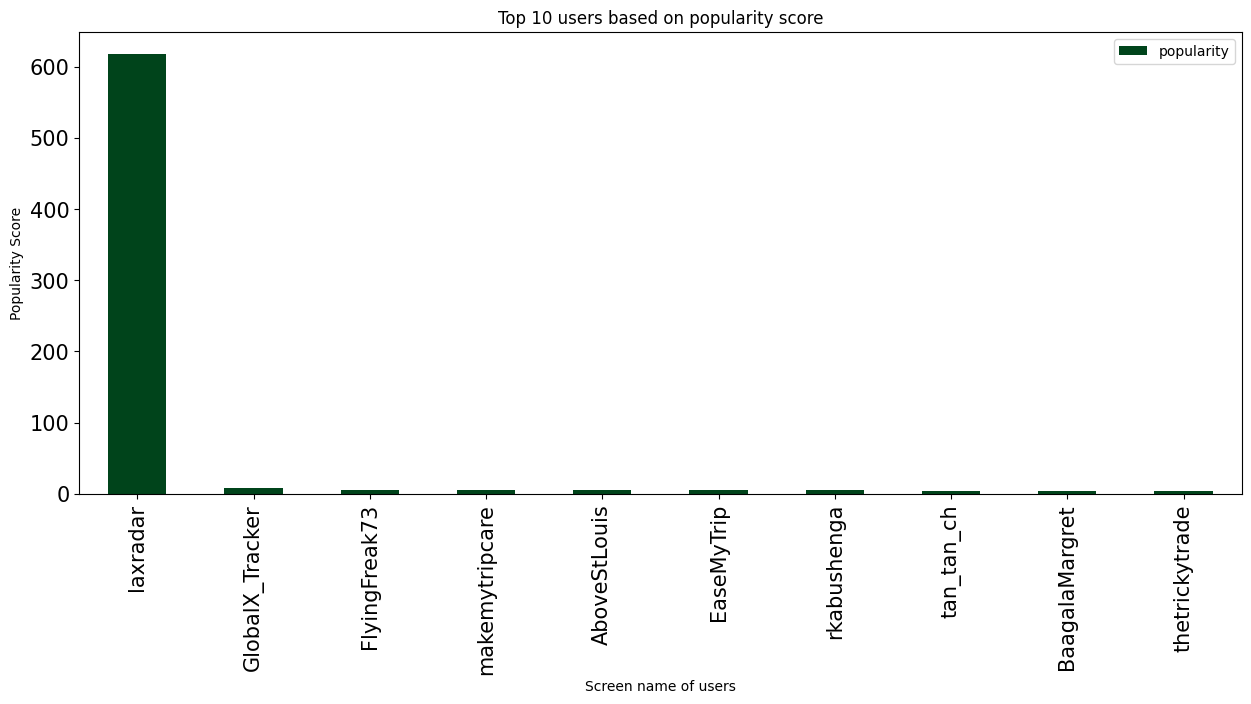

In [40]:
# Graph to plot top 10 popular people based on popularity
ax = pop_top10.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6), fontsize = 15)
ax.set_xlabel('Screen name of users')
ax.set_ylabel('Popularity Score')
plt.xticks(rotation=90)
plt.title("Top 10 users based on popularity score")
plt.savefig('top10UsersPopularityWithoutSentimentAnalysisFinal.png', bbox_inches = 'tight')
plt.show()

2. Influence score

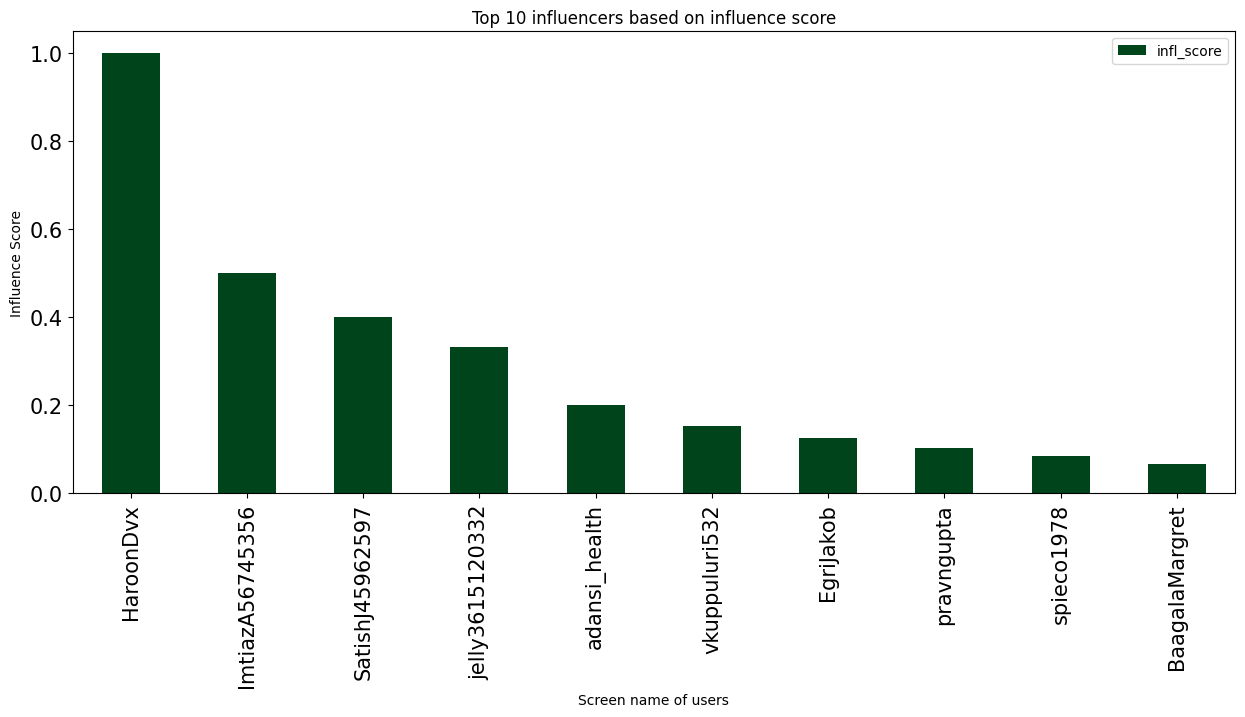

In [41]:
# Graph to plot top 10 influencers
ax = infl_pop_top10.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6), fontsize = 15)
ax.set_xlabel('Screen name of users')
ax.set_ylabel('Influence Score')
plt.xticks(rotation=90)
plt.title("Top 10 influencers based on influence score")
plt.savefig('top10UsersInfluenceWithoutSentimentAnalysisFinal.png', bbox_inches = 'tight')
plt.show()


3. Activity score

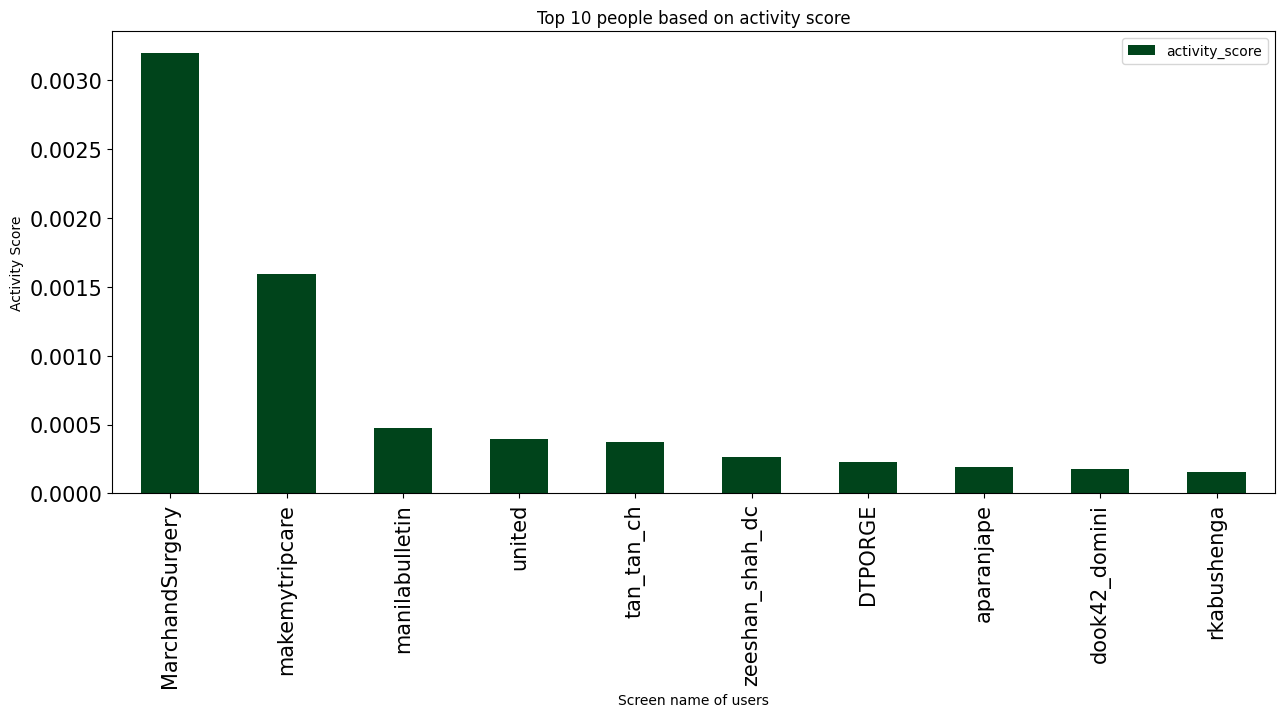

In [42]:
# Graph to plot top 10 active users
ax = activity_pop_top10.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6), fontsize = 15)
ax.set_xlabel('Screen name of users')
ax.set_ylabel('Activity Score')
plt.xticks(rotation=90)
plt.title("Top 10 people based on activity score")
plt.savefig('Top10UsersActivityWithoutSentimentAnalysis.png', bbox_inches = 'tight')
plt.show()

4. Importance score

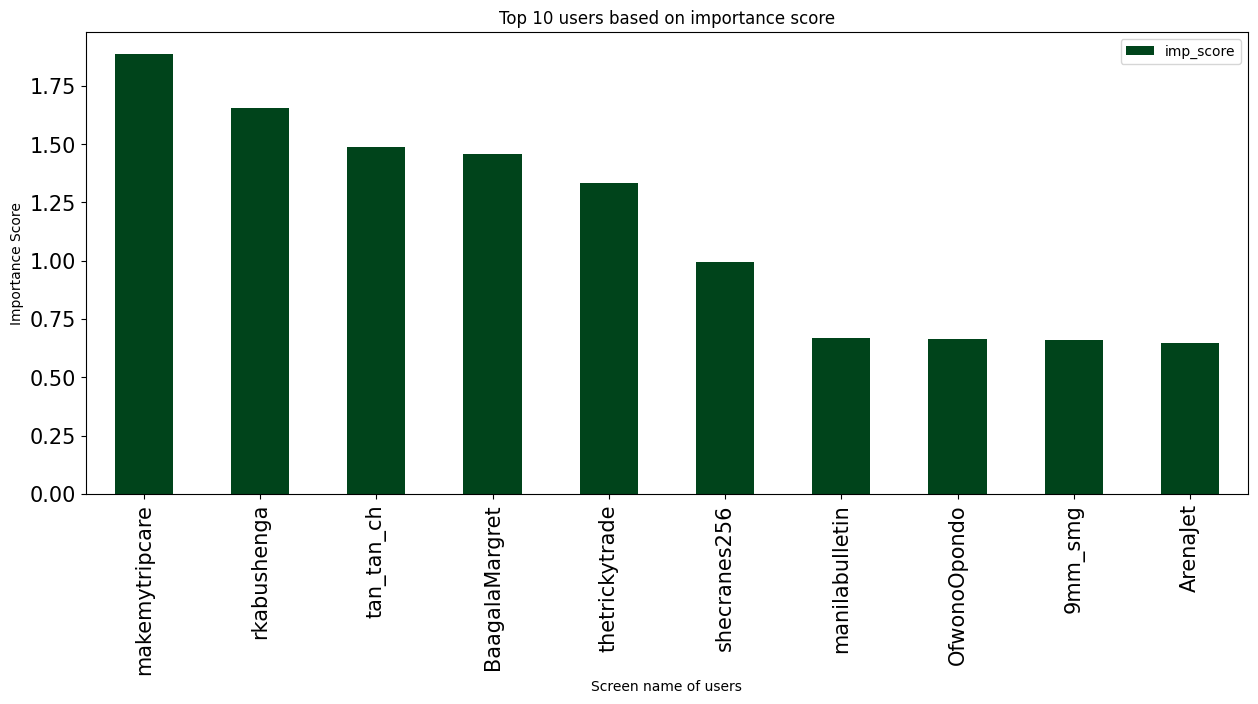

In [43]:
# Graph to plot top 10 important users
ax = imp_top10.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6), fontsize = 15)
ax.set_xlabel('Screen name of users')
ax.set_ylabel('Importance Score')
plt.xticks(rotation=90)
plt.title("Top 10 users based on importance score")
plt.savefig('Top10UsersImportanceWithoutSentimentAnalysis.png', bbox_inches = 'tight')
plt.show()

Finding Overall Sentiments of Top 10 users

In [44]:
names = ['laxradar', 'GlobalX_Tracker', "FlyingFreak73", 'makemytripcare', 'AboveStLouis','EaseMyTrip', 'rkabushenga', 'tan_tan_ch','BaagalaMargret', 'thetrickytrade', 'HaroonDvx', 'ImtiazA56745356', 'SatishJ45962597', 'jelly3615120332', 'adansi_health',
'vkuppuluri532','EgriJakob','pravngupta', 'spieco1978', 'BaagalaMargret','MarchandSurgery','manilabulletin', 'united','tan_tan_ch','zeeshan_shah_dc','DTPORGE', 'dook42_domini','shecranes256','OfwonoOpondo','9mm_smg','ArenaJet','aparanjape','united']

In [45]:
top_users = pos.loc[pos['screen_name'].isin(names)]
#top_users = pos.loc[pos['screen_name'] == 'laxradar']

In [46]:
top_users

,created_at,id,id_str,text,truncated,entities,source,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,...,fav_count,status_count,listed_count,screen_name,original_count,reply_count,popularity,infl_score,activity_score,imp_score
3,2023-06-24 05:42:56+00:00,1672480403553411073,1672480403553411072,United Airlines flight #UAL1597 spotted at 775...,False,"{'hashtags': [{'text': 'UAL1597', 'indices': [...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,NaN,...,9,4946041,15,laxradar,4946041,NaN,0.931741,NaN,NaN,NaN
4,2023-06-24 05:42:26+00:00,1672480280580603904,1672480280580603904,"United Airlines flight #UAL1813 spotted at 29,...",False,"{'hashtags': [{'text': 'UAL1813', 'indices': [...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,NaN,...,9,4946041,15,laxradar,4946041,NaN,0.931741,NaN,NaN,NaN
8,2023-06-24 05:41:14+00:00,1672479977760247813,1672479977760247808,"Delta Airlines flight #DAL542 spotted at 13,35...",False,"{'hashtags': [{'text': 'DAL542', 'indices': [2...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,NaN,...,9,4946041,15,laxradar,4946041,NaN,0.931741,NaN,NaN,NaN
11,2023-06-24 05:40:33+00:00,1672479806007697414,1672479806007697408,American Airlines flight #AAL2004 spotted at 4...,False,"{'hashtags': [{'text': 'AAL2004', 'indices': [...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,NaN,...,9,4946041,15,laxradar,4946041,NaN,0.931741,NaN,NaN,NaN
15,2023-06-24 05:40:00+00:00,1672479669252395008,1672479669252395008,Southwest Airlines flight #SWA9025 spotted at ...,False,"{'hashtags': [{'text': 'SWA9025', 'indices': [...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,NaN,...,9,4946041,15,laxradar,4946041,NaN,0.931741,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2023-07-12 00:51:38+00:00,1678930080310136833,1678930080310136832,"Spirit Airlines flight #NKS953 spotted at 21,0...",False,"{'hashtags': [{'text': 'NKS953', 'indices': [2...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,NaN,...,8,4977703,15,laxradar,4977703,NaN,0.930556,NaN,NaN,NaN
2552,2023-07-12 00:50:55+00:00,1678929897824337920,1678929897824337920,"United Airlines flight #UAL1578 spotted at 17,...",False,"{'hashtags': [{'text': 'UAL1578', 'indices': [...","<a href=""http://null.kiwi.net/"" rel=""nofollow""...",NaN,NaN,NaN,...,8,4977703,15,laxradar,4977703,NaN,0.930556,NaN,NaN,NaN
2553,2023-07-12 00:50:42+00:00,1678929846158622720,1678929846158622720,Flair Airlines #984/C-GCJL arrived at Halifax ...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://flightaware.com/"" rel=""nofollo...",NaN,NaN,NaN,...,169,21989,5,GlobalX_Tracker,21989,NaN,0.800000,NaN,NaN,NaN
2554,2023-07-12 00:50:30+00:00,1678929795432976385,1678929795432976384,China Airlines\nCI120 CAL120\nfrom TPE to OKA\...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,...,1434,125373,28,tan_tan_ch,125373,1.0,0.445806,0.001885,0.000037,0.149243


In [47]:
top_users['screen_name'].unique()

array(['laxradar', 'pravngupta', 'SatishJ45962597', 'FlyingFreak73',
       'thetrickytrade', 'manilabulletin', 'EaseMyTrip', 'makemytripcare',
       'shecranes256', 'BaagalaMargret', 'AboveStLouis',
       'ImtiazA56745356', 'HaroonDvx', 'dook42_domini', 'OfwonoOpondo',
       'GlobalX_Tracker', 'united', 'rkabushenga', 'tan_tan_ch',
       'EgriJakob', 'zeeshan_shah_dc', 'spieco1978', 'adansi_health',
       'aparanjape', 'DTPORGE', 'MarchandSurgery', 'ArenaJet', '9mm_smg',
       'jelly3615120332', 'vkuppuluri532'], dtype=object)

In [48]:
tweet_list = top_users

In [49]:
tweet_list.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'source',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'is_quote_status', 'retweet_count',
       'favorite_count', 'possibly_sensitive', 'usr_name', 'foll_count',
       'friends_count', 'fav_count', 'status_count', 'listed_count',
       'screen_name', 'original_count', 'reply_count', 'popularity',
       'infl_score', 'activity_score', 'imp_score'],
      dtype='object')

In [50]:
tw_list = tweet_list[['screen_name','text']]

In [51]:
tw_list.columns

Index(['screen_name', 'text'], dtype='object')

In [52]:
# Creating a function for cleaning the tweets. It will clean RT, link, punctuation, characters and finally convert to lowercase.
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

In [53]:
# Call function to get Clean tweets
tw_list['cleanedtext'] = tw_list['text'].apply(lambda x : clean_tweet(x))
tw_list.cleanedtext.head(10)

<ipython-input-53-c1e79c4062ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list['cleanedtext'] = tw_list['text'].apply(lambda x : clean_tweet(x))


3     united airlines flight ual1597 spotted at 775 ...
4     united airlines flight ual1813 spotted at 29 8...
8     delta airlines flight dal542 spotted at 13 350...
11    american airlines flight aal2004 spotted at 4 ...
15    southwest airlines flight swa9025 spotted at 2...
21    delta airlines flight dal442 spotted at 23 875...
25    united airlines flight ual512 spotted at 22 07...
29    sun country airlines flight scx429 spotted at ...
30    spirit airlines flight nks656 spotted at 17 82...
35    spirit airlines flight nks473 spotted at 16 27...
Name: cleanedtext, dtype: object

In [54]:
#Calculating polarity, subjectivity using TextBlob
# Subjectivity quantifies the amount of personal opinion and factual information contained in the text.Higher subjectivity indicates that text contains personal opinion rather than factual information.
tw_list[['polarity', 'subjectivity']] = tw_list['cleanedtext'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


<ipython-input-54-8f91899c46b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list[['polarity', 'subjectivity']] = tw_list['cleanedtext'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
<ipython-input-54-8f91899c46b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list[['polarity', 'subjectivity']] = tw_list['cleanedtext'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


In [55]:
tw_list.columns

Index(['screen_name', 'text', 'cleanedtext', 'polarity', 'subjectivity'], dtype='object')

Method 2: Sentiment Analysis

In [56]:
# Calculating sentiment based on higher positive score or negative score
for index, row in tw_list['cleanedtext'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    tw_list.loc[index, 'sentiment'] = "positive"
  else:
    tw_list.loc[index, 'sentiment'] = "neutral"

  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp


<ipython-input-56-3bcf89efe64b>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['cleanedtext'].iteritems():
<ipython-input-56-3bcf89efe64b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list.loc[index, 'sentiment'] = "positive"
<ipython-input-56-3bcf89efe64b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_list.loc[index, 'neg'] = neg
<ipython-input-56-3bcf89efe64b>:16: SettingWithCopyWarning: 
A value is trying t

In [57]:
tw_list

,screen_name,text,cleanedtext,polarity,subjectivity,sentiment,neg,neu,pos,compound
3,laxradar,United Airlines flight #UAL1597 spotted at 775...,united airlines flight ual1597 spotted at 775 ...,0.0,0.0,positive,0.0,0.714,0.286,0.4215
4,laxradar,"United Airlines flight #UAL1813 spotted at 29,...",united airlines flight ual1813 spotted at 29 8...,0.0,0.0,positive,0.0,0.741,0.259,0.4215
8,laxradar,"Delta Airlines flight #DAL542 spotted at 13,35...",delta airlines flight dal542 spotted at 13 350...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
11,laxradar,American Airlines flight #AAL2004 spotted at 4...,american airlines flight aal2004 spotted at 4 ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
15,laxradar,Southwest Airlines flight #SWA9025 spotted at ...,southwest airlines flight swa9025 spotted at 2...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
2549,laxradar,"Spirit Airlines flight #NKS953 spotted at 21,0...",spirit airlines flight nks953 spotted at 21 05...,0.0,0.0,positive,0.0,0.825,0.175,0.1779
2552,laxradar,"United Airlines flight #UAL1578 spotted at 17,...",united airlines flight ual1578 spotted at 17 3...,0.0,0.0,positive,0.0,0.741,0.259,0.4215
2553,GlobalX_Tracker,Flair Airlines #984/C-GCJL arrived at Halifax ...,flair airlines 984 c gcjl arrived at halifax i...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000
2554,tan_tan_ch,China Airlines\nCI120 CAL120\nfrom TPE to OKA\...,china airlines ci120 cal120 from tpe to oka a3...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000


In [58]:
tw_list['neg'].nunique()

28

In [59]:
tw_list.to_csv('AllUsersSentimentScores.csv')

Finding overall sentiment of users with tie up sentiments

In [60]:
# Extracting columns from original dataframe tw_list
top_user_sentiment = tw_list[['screen_name','sentiment']]

In [61]:
top_user_sentiment['sentiment'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [62]:
# Grouping according to screen name so that multiple tweets by same users can be considered
top_user_final = top_user_sentiment.groupby(['screen_name','sentiment']).size().sort_values()

In [63]:
top_user_final

screen_name      sentiment
zeeshan_shah_dc  neutral        1
SatishJ45962597  negative       1
OfwonoOpondo     positive       1
                 neutral        1
pravngupta       positive       1
ImtiazA56745356  negative       1
HaroonDvx        negative       1
rkabushenga      negative       1
pravngupta       negative       1
vkuppuluri532    positive       1
EgriJakob        negative       1
jelly3615120332  positive       1
spieco1978       neutral        1
DTPORGE          negative       1
thetrickytrade   negative       1
ArenaJet         positive       1
                 neutral        1
AboveStLouis     positive       1
united           positive       1
vkuppuluri532    neutral        1
adansi_health    positive       1
aparanjape       negative       1
rkabushenga      neutral        2
spieco1978       negative       2
rkabushenga      positive       2
manilabulletin   neutral        2
9mm_smg          negative       2
dook42_domini    positive       2
AboveStLouis     nega

In [64]:
top_user_final.to_csv('top10UsersSentiments1.csv')

Comment: It is evident from above output that there are many top users which has negative, positive and neutral sentiments.

In [65]:
# Reading the dataset
data = pd.read_csv('top10UsersSentiments1.csv', encoding='utf-8') # Read the dataset
data.head(10)
df = data.copy()
#df.drop('Unnamed: 0', axis=1,inplace=True)

In [66]:
df

,screen_name,sentiment,0
0,zeeshan_shah_dc,neutral,1
1,SatishJ45962597,negative,1
2,OfwonoOpondo,positive,1
3,OfwonoOpondo,neutral,1
4,pravngupta,positive,1
5,ImtiazA56745356,negative,1
6,HaroonDvx,negative,1
7,rkabushenga,negative,1
8,pravngupta,negative,1
9,vkuppuluri532,positive,1


In [67]:
df.rename(columns = {'0': 'count'})

,screen_name,sentiment,count
0,zeeshan_shah_dc,neutral,1
1,SatishJ45962597,negative,1
2,OfwonoOpondo,positive,1
3,OfwonoOpondo,neutral,1
4,pravngupta,positive,1
5,ImtiazA56745356,negative,1
6,HaroonDvx,negative,1
7,rkabushenga,negative,1
8,pravngupta,negative,1
9,vkuppuluri532,positive,1


In [68]:
df['screen_name'].unique()

array(['zeeshan_shah_dc', 'SatishJ45962597', 'OfwonoOpondo', 'pravngupta',
       'ImtiazA56745356', 'HaroonDvx', 'rkabushenga', 'vkuppuluri532',
       'EgriJakob', 'jelly3615120332', 'spieco1978', 'DTPORGE',
       'thetrickytrade', 'ArenaJet', 'AboveStLouis', 'united',
       'adansi_health', 'aparanjape', 'manilabulletin', '9mm_smg',
       'dook42_domini', 'EaseMyTrip', 'shecranes256', 'makemytripcare',
       'MarchandSurgery', 'tan_tan_ch', 'FlyingFreak73', 'BaagalaMargret',
       'GlobalX_Tracker', 'laxradar'], dtype=object)

In [73]:
# Resolving cases with tie values
# There are cases with multiple sentiments with tie up values. Considering cases with tie values
dup = df[df.duplicated('screen_name', keep = False)]

In [74]:
dup

,screen_name,sentiment,0
2,OfwonoOpondo,positive,1
3,OfwonoOpondo,neutral,1
4,pravngupta,positive,1
7,rkabushenga,negative,1
8,pravngupta,negative,1
9,vkuppuluri532,positive,1
12,spieco1978,neutral,1
14,thetrickytrade,negative,1
15,ArenaJet,positive,1
16,ArenaJet,neutral,1


In [75]:
dup.nunique()

screen_name    13
sentiment       3
0               8
dtype: int64

In [76]:
dup.rename(columns = {'0': 'count'}, inplace = True)

<ipython-input-76-d81203dfb590>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup.rename(columns = {'0': 'count'}, inplace = True)


In [79]:
dup.columns

Index(['screen_name', 'sentiment', 'count'], dtype='object')

Considering neutral sentiment: Adding count of neutral sentiments with count of positive sentiments and  calculating overall sentiments

In [80]:
pos = dup.loc[(dup['sentiment'] == 'positive') | (dup['sentiment'] == 'neutral')]

In [81]:
pos

,screen_name,sentiment,count
2,OfwonoOpondo,positive,1
3,OfwonoOpondo,neutral,1
4,pravngupta,positive,1
9,vkuppuluri532,positive,1
12,spieco1978,neutral,1
15,ArenaJet,positive,1
16,ArenaJet,neutral,1
17,AboveStLouis,positive,1
19,vkuppuluri532,neutral,1
22,rkabushenga,neutral,2


In [83]:
# Adding count of positive and neutral sentiments for each user/screen name
positive = pos.groupby(['screen_name'])['count'].sum()

In [84]:
positive

screen_name
AboveStLouis        5
ArenaJet            2
EaseMyTrip          3
FlyingFreak73       5
OfwonoOpondo        2
laxradar          664
makemytripcare      3
pravngupta          1
rkabushenga         4
spieco1978          1
tan_tan_ch         10
thetrickytrade      3
vkuppuluri532       2
Name: count, dtype: int64

In [85]:
positive = pd.DataFrame(positive)

In [86]:
positive.rename({'0': 'count'}).reset_index()

,screen_name,count
0,AboveStLouis,5
1,ArenaJet,2
2,EaseMyTrip,3
3,FlyingFreak73,5
4,OfwonoOpondo,2
5,laxradar,664
6,makemytripcare,3
7,pravngupta,1
8,rkabushenga,4
9,spieco1978,1


In [87]:
# Resolving cases with negative sentiments
neg = dup.loc[dup['sentiment'] == 'negative']

In [88]:
neg

,screen_name,sentiment,count
7,rkabushenga,negative,1
8,pravngupta,negative,1
14,thetrickytrade,negative,1
23,spieco1978,negative,2
28,AboveStLouis,negative,2
29,EaseMyTrip,negative,2
37,FlyingFreak73,negative,5
38,makemytripcare,negative,5


In [89]:
# Merging cases with positive (positive + neutral) and negative sentiments
df_common = positive.merge(neg, on = 'screen_name', how = 'outer')

In [90]:
df_common

,screen_name,count_x,sentiment,count_y
0,AboveStLouis,5,negative,2.0
1,ArenaJet,2,NaN,NaN
2,EaseMyTrip,3,negative,2.0
3,FlyingFreak73,5,negative,5.0
4,OfwonoOpondo,2,NaN,NaN
5,laxradar,664,NaN,NaN
6,makemytripcare,3,negative,5.0
7,pravngupta,1,negative,1.0
8,rkabushenga,4,negative,1.0
9,spieco1978,1,negative,2.0


In [91]:
# Replacing nan values with 0
df_common = df_common.fillna(0)

In [92]:
df_common

,screen_name,count_x,sentiment,count_y
0,AboveStLouis,5,negative,2.0
1,ArenaJet,2,0,0.0
2,EaseMyTrip,3,negative,2.0
3,FlyingFreak73,5,negative,5.0
4,OfwonoOpondo,2,0,0.0
5,laxradar,664,0,0.0
6,makemytripcare,3,negative,5.0
7,pravngupta,1,negative,1.0
8,rkabushenga,4,negative,1.0
9,spieco1978,1,negative,2.0


After adding neutral and positive sentiments, there are cases tie values i.e. equal count of positive and negative sentiment values. Resolving such cases by considering them as neutral sentiment (overall)

In [93]:
pos1 = df_common.loc[df_common['count_x'] > df_common['count_y'] ] # count_x are positive sentiments count; count_y is negative sentiments count

In [94]:
pos1

,screen_name,count_x,sentiment,count_y
0,AboveStLouis,5,negative,2.0
1,ArenaJet,2,0,0.0
2,EaseMyTrip,3,negative,2.0
4,OfwonoOpondo,2,0,0.0
5,laxradar,664,0,0.0
8,rkabushenga,4,negative,1.0
10,tan_tan_ch,10,0,0.0
11,thetrickytrade,3,negative,1.0
12,vkuppuluri532,2,0,0.0


In [95]:
pos1['sentiment'] = pos1['sentiment'].replace('negative', 'positive')
pos1['sentiment'] = pos1['sentiment'].replace(0, 'positive')

<ipython-input-95-9bfb5cc61a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos1['sentiment'] = pos1['sentiment'].replace('negative', 'positive')
<ipython-input-95-9bfb5cc61a24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos1['sentiment'] = pos1['sentiment'].replace(0, 'positive')


In [96]:
pos1.drop(['count_x','count_y'], axis = 1, inplace = True)

<ipython-input-96-9b04f67cab49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos1.drop(['count_x','count_y'], axis = 1, inplace = True)


In [97]:
pos1

,screen_name,sentiment
0,AboveStLouis,positive
1,ArenaJet,positive
2,EaseMyTrip,positive
4,OfwonoOpondo,positive
5,laxradar,positive
8,rkabushenga,positive
10,tan_tan_ch,positive
11,thetrickytrade,positive
12,vkuppuluri532,positive


In [98]:
# Resolving negative sentiment cases
neg1 = df_common.loc[df_common['count_y'] > df_common['count_x']] # count_x are positive sentiments count; count_y is negative sentiments count

In [99]:
neg1

,screen_name,count_x,sentiment,count_y
6,makemytripcare,3,negative,5.0
9,spieco1978,1,negative,2.0


In [100]:
neg1.drop(['count_x','count_y'], axis = 1, inplace = True)

<ipython-input-100-f93dbef77996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg1.drop(['count_x','count_y'], axis = 1, inplace = True)


In [101]:
neg1

,screen_name,sentiment
6,makemytripcare,negative
9,spieco1978,negative


Handling Neutral sentiments

In [102]:
neu1 = df_common.loc[df_common['count_x'] == df_common['count_y']]

In [103]:
neu1

,screen_name,count_x,sentiment,count_y
3,FlyingFreak73,5,negative,5.0
7,pravngupta,1,negative,1.0


In [104]:
neu1['sentiment'] = neu1['sentiment'].replace('negative', 'neutral')

<ipython-input-104-bbdbd1e5d5ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neu1['sentiment'] = neu1['sentiment'].replace('negative', 'neutral')


In [105]:
neu1.drop(['count_x','count_y'], axis = 1, inplace = True)

<ipython-input-105-b16eb29b453b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neu1.drop(['count_x','count_y'], axis = 1, inplace = True)


In [106]:
neu1

,screen_name,sentiment
3,FlyingFreak73,neutral
7,pravngupta,neutral


In [107]:
df_final = pd.concat([pos1,neg1, neu1], axis = 0)

In [108]:
df_final

,screen_name,sentiment
0,AboveStLouis,positive
1,ArenaJet,positive
2,EaseMyTrip,positive
4,OfwonoOpondo,positive
5,laxradar,positive
8,rkabushenga,positive
10,tan_tan_ch,positive
11,thetrickytrade,positive
12,vkuppuluri532,positive
6,makemytripcare,negative


In [109]:
df_final.to_csv('top10UserSentiment_Final2.csv')